# Trending YouTube Video 探索性分析与预处理报告

In [6]:
%matplotlib inline
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
import youtube_process

In [7]:
import json
def get_category_list(path,filename):
    with open(path + '/' + filename ,'r') as f:
        d = json.load(f)
    res = {}
    for i in d['items']:
        res[i['id']] = i['snippet']['title']
    return res

In [8]:
def load_data(path,filename):
    return pd.read_csv(path + '/' + filename,keep_default_na=False)

确定数据集根目录：

In [9]:
root = 'data/youtube-new/'

## 1. 美国
导入数据：

In [10]:
US = youtube_process.country_data(root, 'USvideos.csv')
US_data = US.data
US_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


数据包含：  
1. video_id  视频id
2. trending_date  流行日期
3. title  标题
4. channel_title  频道标题
5. category_id  类别id
6. publish_time  发布时间
7. tags  标签
8. views  观看量
9. likes  点赞量
10. dislikes  踩量
11. comment_count  评论数量
12. thumbnail_link  视频链接
13. comments_disabled  是否禁止评论
14. ratings_disabled  是否禁止评分
15. video_error_or_removed  视频是否失效或被移除
16. description  介绍

### Trending date

频数：

In [11]:
frequency_trending_date = US_data['trending_date'].value_counts()
frequency_trending_date

18.02.01    200
18.30.04    200
18.21.05    200
18.11.05    200
17.24.11    200
           ... 
18.01.02    197
18.31.01    197
18.03.02    196
18.04.02    196
18.02.02    196
Name: trending_date, Length: 205, dtype: int64

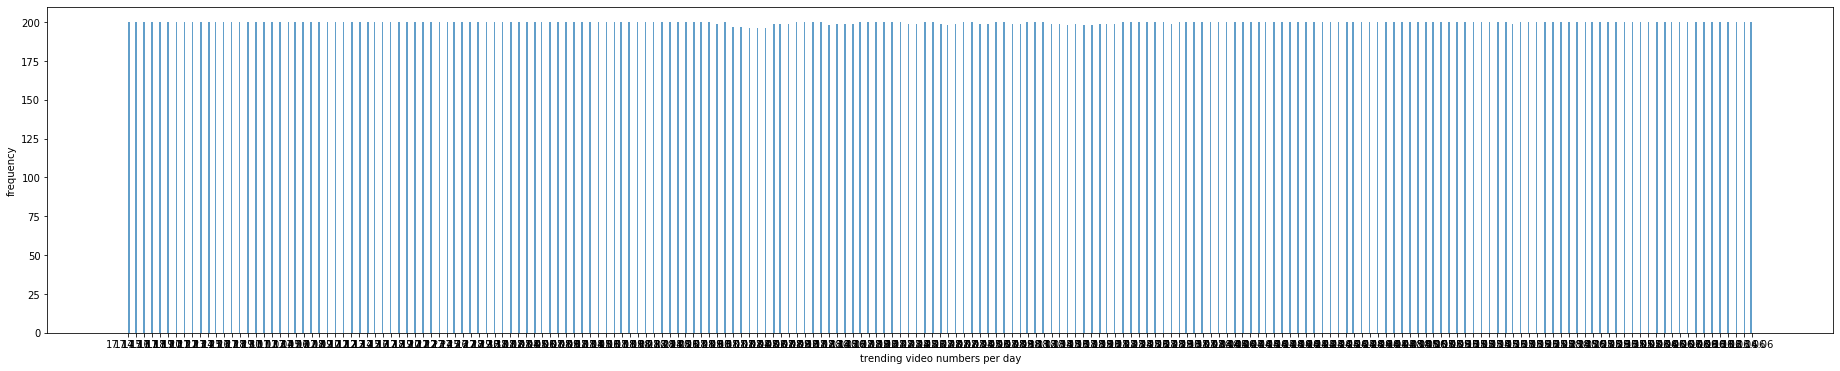

In [12]:
fig = plt.figure(figsize = (32, 6))
plt.hist(np.array(US_data['trending_date']), bins = 1000, alpha = 0.7)
plt.xlabel('trending video numbers per day')
plt.ylabel('frequency')
plt.show()

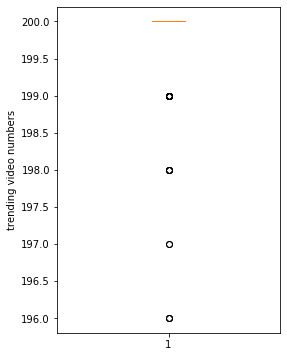

In [13]:
fig = plt.figure(figsize=(4, 6))
plt.boxplot(np.array(frequency_trending_date), notch=False, vert=True)
plt.ylabel('trending video numbers')
plt.show()

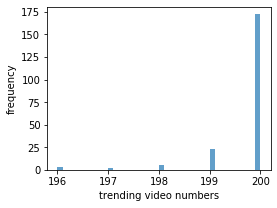

In [14]:
fig = plt.figure(figsize = (4, 3))
plt.hist(np.array(frequency_trending_date), bins = 40, alpha = 0.7)
plt.xlabel('trending video numbers')
plt.ylabel('frequency')
plt.show()

由以上结果可知，大多数日期流行的视频数都是200个，少数日期为196，197个。  
因为大多数数据都为200，因此出现次数较少的196，197，198，199为离群点。

### Category

In [15]:
US_category_list = get_category_list(root, 'US_category_id.json')
US_category_list

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [16]:
category = []
for i in US_data['category_id'].values:
    if(str(i) in US_category_list.keys()):
        category.append(US_category_list[str(i)])
    else:
        category.append('unknown')
category

['People & Blogs',
 'Entertainment',
 'Comedy',
 'Entertainment',
 'Entertainment',
 'Science & Technology',
 'Entertainment',
 'Science & Technology',
 'Film & Animation',
 'News & Politics',
 'Sports',
 'Entertainment',
 'Music',
 'News & Politics',
 'Pets & Animals',
 'Science & Technology',
 'Comedy',
 'Education',
 'Science & Technology',
 'Education',
 'Education',
 'Science & Technology',
 'Education',
 'Howto & Style',
 'Comedy',
 'Entertainment',
 'Science & Technology',
 'Howto & Style',
 'News & Politics',
 'Film & Animation',
 'Autos & Vehicles',
 'Entertainment',
 'Music',
 'Entertainment',
 'Travel & Events',
 'People & Blogs',
 'Film & Animation',
 'Music',
 'Comedy',
 'Music',
 'Music',
 'News & Politics',
 'Sports',
 'Music',
 'People & Blogs',
 'Howto & Style',
 'Entertainment',
 'Sports',
 'Sports',
 'Entertainment',
 'Entertainment',
 'News & Politics',
 'Sports',
 'Music',
 'People & Blogs',
 'Entertainment',
 'Sports',
 'News & Politics',
 'Autos & Vehicles',
 'En

In [17]:
frequency_category = pd.Series(category).value_counts()
frequency_category

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Shows                      57
Nonprofits & Activism      57
dtype: int64

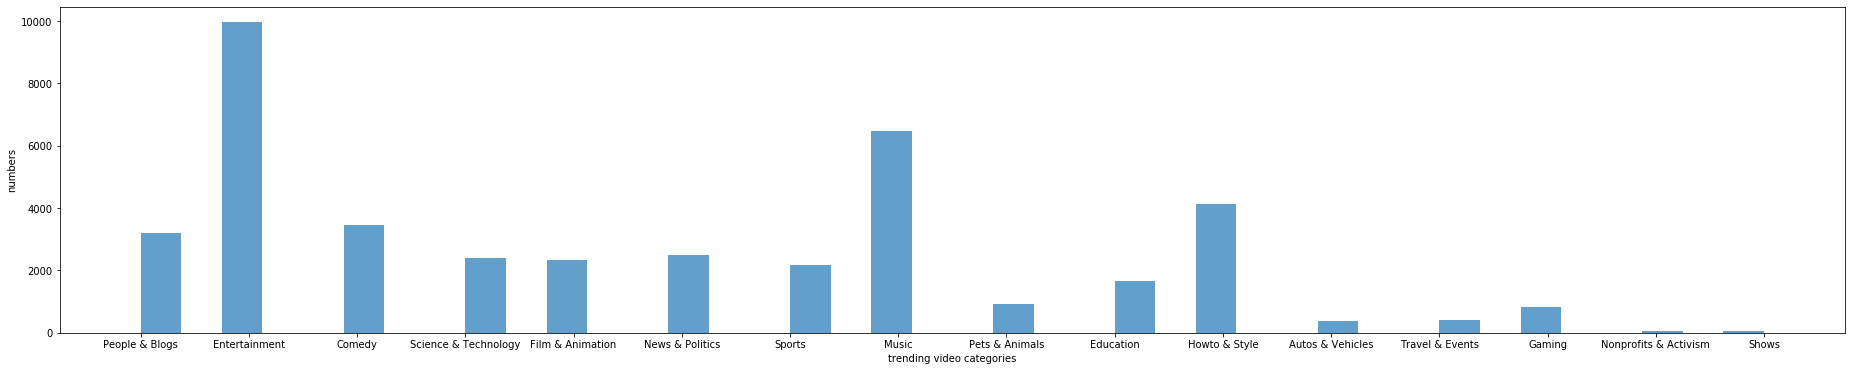

In [18]:
fig = plt.figure(figsize = (32, 6))
plt.hist(np.array(category), bins = 40, alpha = 0.7)
plt.xlabel('trending video categories')
plt.ylabel('numbers')
plt.show()

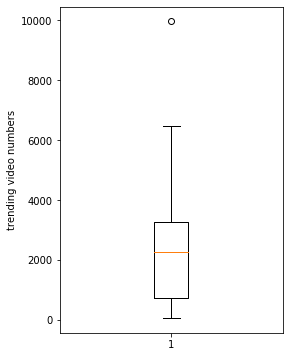

In [19]:
fig = plt.figure(figsize=(4, 6))
plt.boxplot(np.array(frequency_category), notch=False, vert=True)
plt.ylabel('trending video numbers')
plt.show()

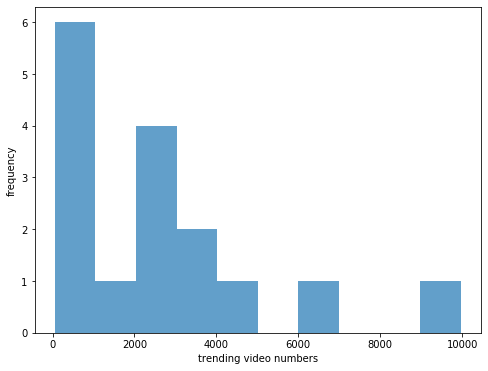

In [20]:
fig = plt.figure(figsize = (8, 6))
plt.hist(np.array(frequency_category), alpha = 0.7)
plt.xlabel('trending video numbers')
plt.ylabel('frequency')
plt.show()

由以上结果可知，最为流行的类别是娱乐类的视频，紧接着的是音乐和“Howto & style”。  
娱乐类视频的频数特别高，为9964，从盒图可以看出，该点为离群点。  
由频数直方图可以看出，视频数量集中在0-5000之间。

### Tags
数据集中Tag项存在缺失值。  
可能的原因：up主在上传视频时没有添加标签。  
可以处理的方式：  
- 将缺失值的条目删除
- 用title代替


In [21]:
none_tags_quantity = [x for x in US_data['tags'] if x == '[none]']
len(none_tags_quantity)

1535

In [22]:
US_data['tags']
for i in range(len(US_data['tags'])):
    if(US_data['tags'][i] == '[none]'):
        US_data.loc[i,'tags'] = US_data.loc[i,'title']

In [23]:
none_tags_quantity = [x for x in US_data['tags'] if x == '[none]']
len(none_tags_quantity)

0

### Views

In [24]:
US_data_views = np.array(US_data['views'])
US_data_views.sort()
for i in range(0,101,25):
        print(np.percentile(US_data_views, i))
outlier = np.percentile(US_data_views,75) + (np.percentile(US_data_views,75) - np.percentile(US_data_views,25)) * 1.5
print('离群点：', outlier)

549.0
242329.0
681861.0
1823157.0
225211923.0
离群点： 4194399.0


以上结果为五数概括和离群点。

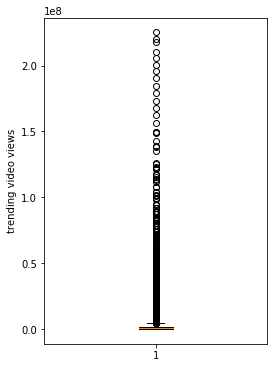

In [25]:
fig = plt.figure(figsize=(4, 6))
plt.boxplot(US_data_views, notch=False, vert=True)
plt.ylabel('trending video views')
plt.show()

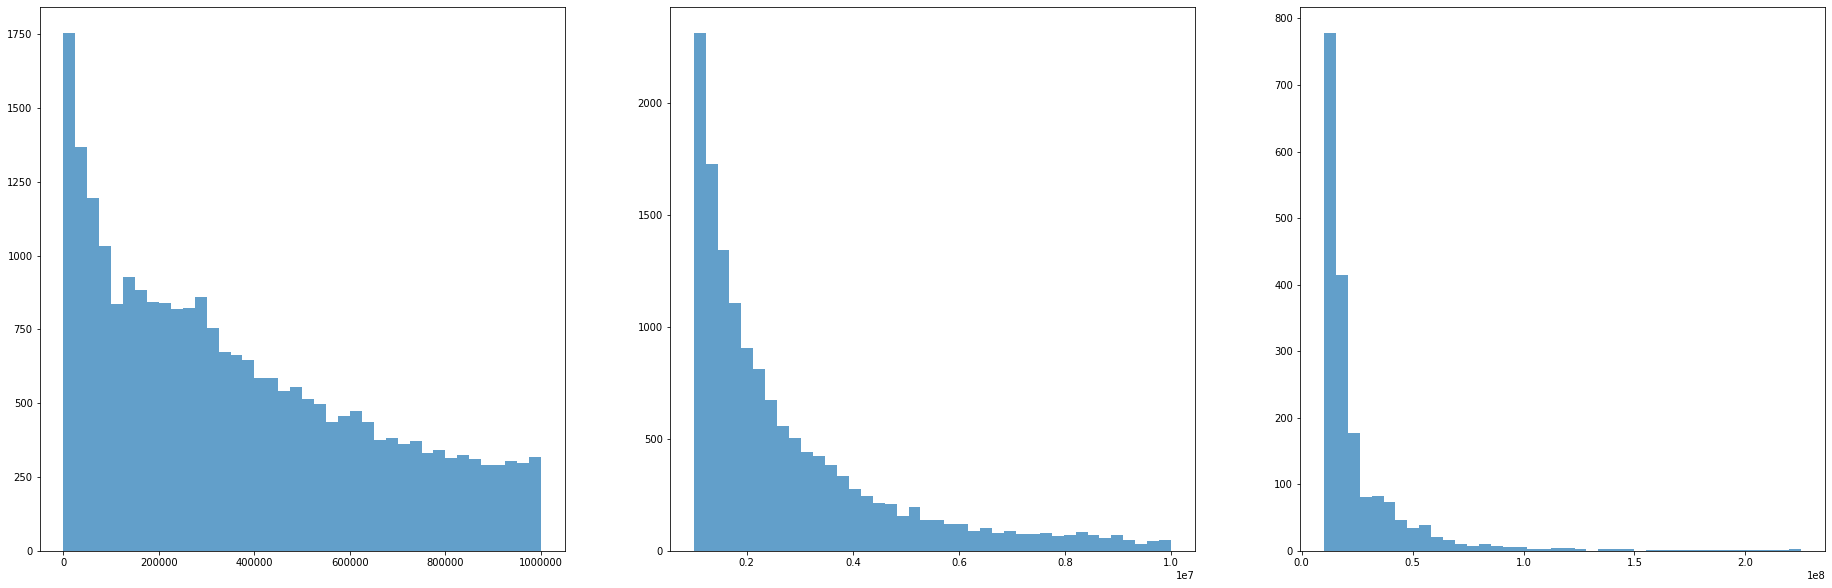

In [26]:
US.select_col('views')
US.seg_hist(1000000,10000000,32,10,'trending video views','frequency')

由以上结果可知，超过4194399的点是离群点。  
由直方图可以看出，视频播放量差异明显，400w观看量以下的视频占了大多数。

### Likes

In [27]:
US_data_likes = np.array(US_data['likes'])
US_data_likes.sort()
for i in range(0,101,25):
        print(np.percentile(US_data_likes, i))
outlier = np.percentile(US_data_likes,75) + (np.percentile(US_data_likes,75) - np.percentile(US_data_likes,25)) * 1.5
print('离群点：', outlier)

0.0
5424.0
18091.0
55417.0
5613827.0
离群点： 130406.5


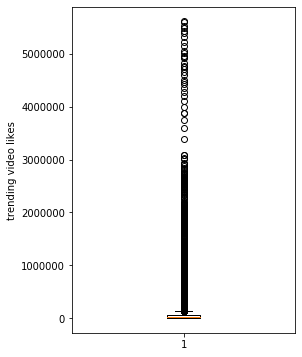

In [28]:
fig = plt.figure(figsize=(4, 6))
plt.boxplot(US_data_likes, notch=False, vert=True)
plt.ylabel('trending video likes')
plt.show()

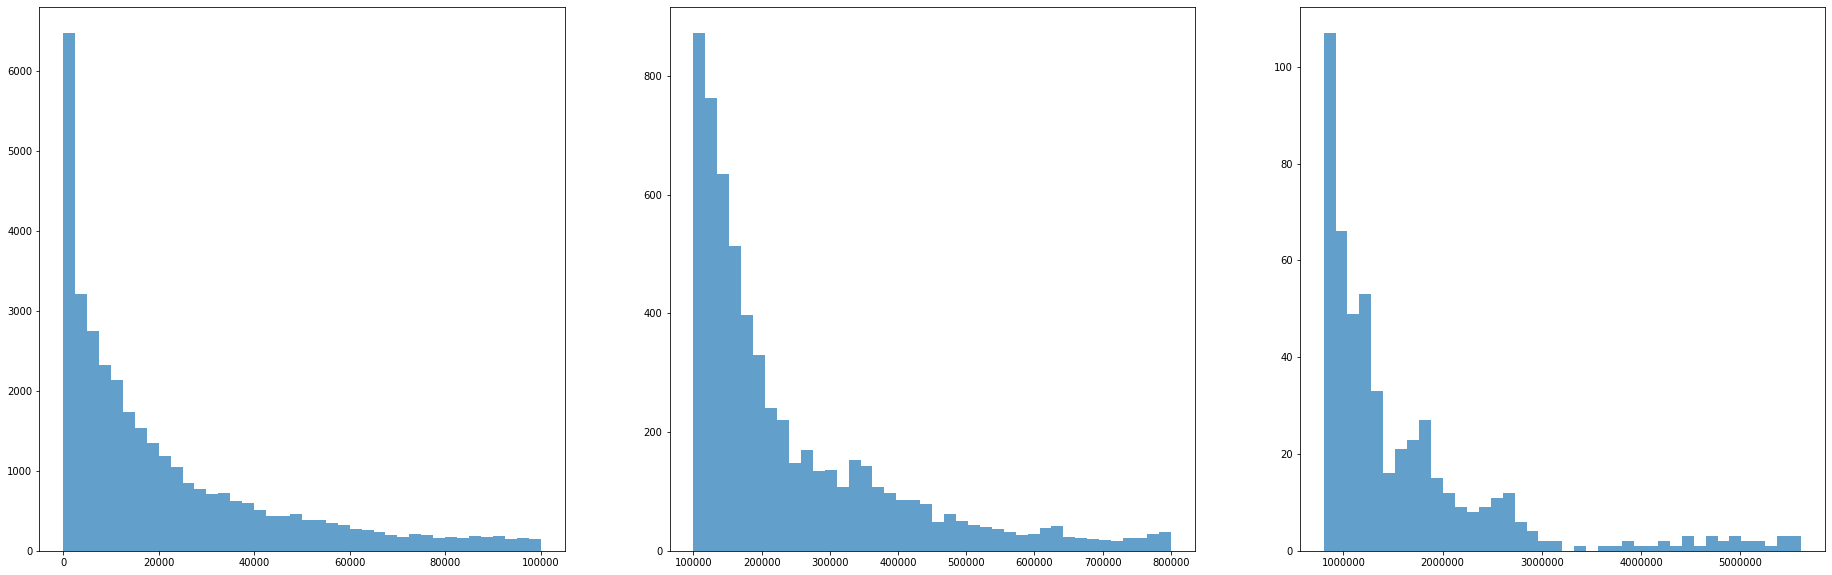

In [29]:
US.select_col('likes')
US.seg_hist(100000,800000,32,10,'trending video likes','frequency')

由以上结果可知，超过130406.5的点是离群点。  
由直方图可以看出，视频点赞量差异明显，2w点赞量以下的视频占了大多数。

### Dislikes

In [30]:
US_data_dislikes = np.array(US_data['dislikes'])
US_data_dislikes.sort()
for i in range(0,101,25):
        print(np.percentile(US_data_dislikes, i))
outlier = np.percentile(US_data_dislikes,75) + (np.percentile(US_data_dislikes,75) - np.percentile(US_data_dislikes,25)) * 1.5
print('离群点：', outlier)

0.0
202.0
631.0
1938.0
1674420.0
离群点： 4542.0


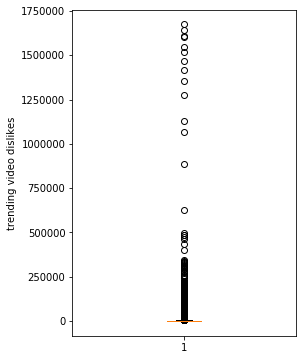

In [31]:
fig = plt.figure(figsize=(4, 6))
plt.boxplot(US_data_dislikes, notch=False, vert=True)
plt.ylabel('trending video dislikes')
plt.show()

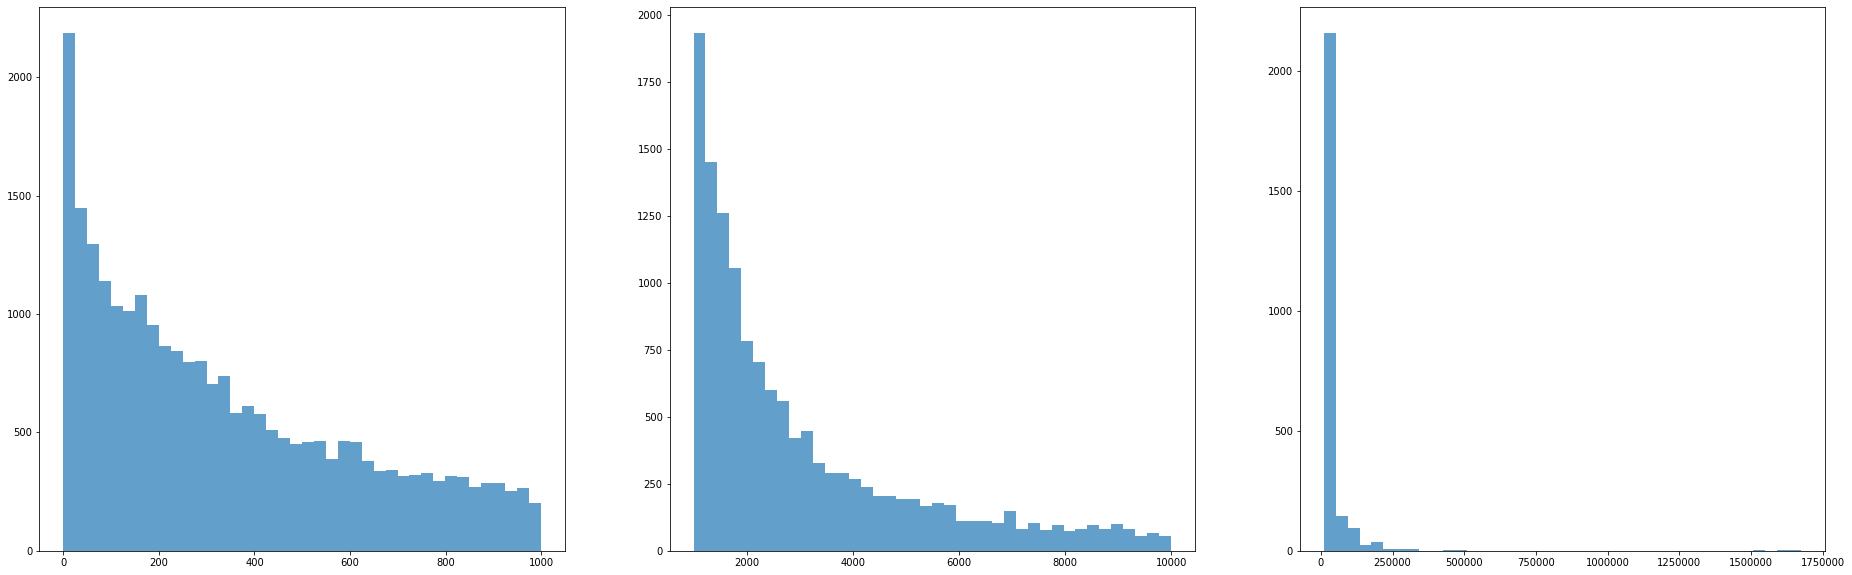

In [32]:
US.select_col('dislikes')
US.seg_hist(1000,10000,32,10,'trending video dislikes','frequency')

由以上结果可知，超过4542.0的点是离群点。  
由直方图可以看出，视频踩量差异明显，3000踩量以下的视频占了大多数。

### Comment_count

In [33]:
US_data_comment_count = np.array(US_data['comment_count'])
US_data_comment_count.sort()
for i in range(0,101,25):
        print(np.percentile(US_data_comment_count, i))
outlier = np.percentile(US_data_comment_count,75) + (np.percentile(US_data_comment_count,75) - np.percentile(US_data_comment_count,25)) * 1.5
print('离群点：', outlier)

0.0
614.0
1856.0
5755.0
1361580.0
离群点： 13466.5


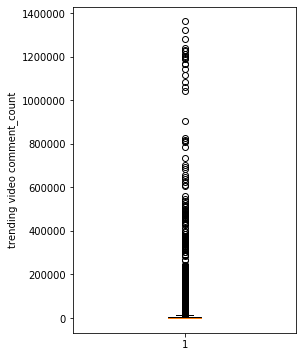

In [34]:
fig = plt.figure(figsize=(4, 6))
plt.boxplot(US_data_comment_count, notch=False, vert=True)
plt.ylabel('trending video comment_count')
plt.show()

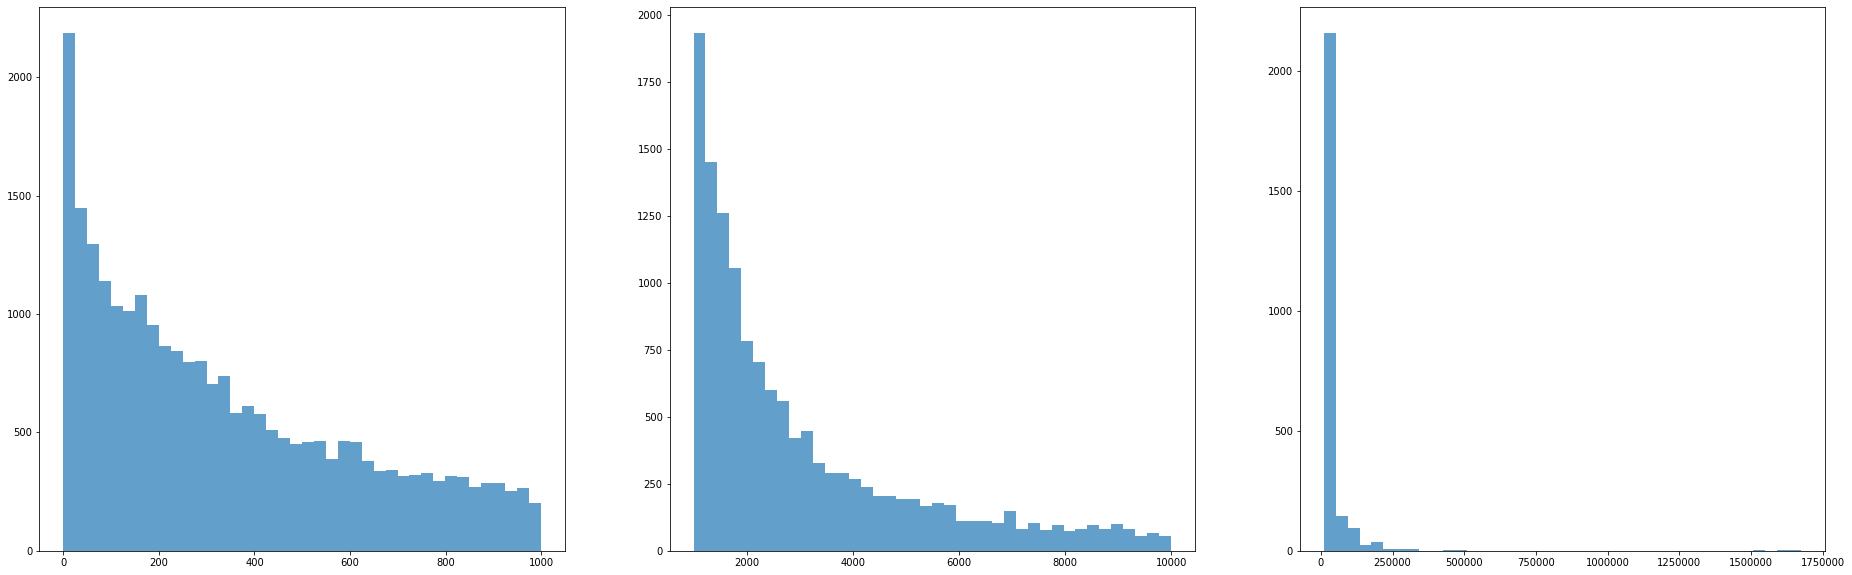

In [35]:
US.select_col('dislikes')
US.seg_hist(1000,10000,32,10,'trending video comment count','frequency')

由以上结果可知，超过13466.5的点是离群点。  
由直方图可以看出，视频评论数量差异明显，3000视频评论量以下的视频占了大多数。

### Comments_disabled

In [36]:
US_data_comments_disabled = US_data['comments_disabled'].value_counts()
US_data_comments_disabled

False    40316
True       633
Name: comments_disabled, dtype: int64

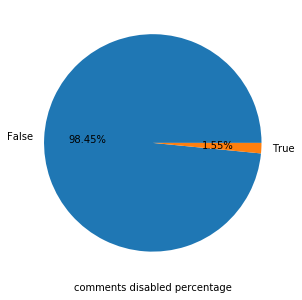

In [37]:
fig = plt.figure(figsize = (5, 5))
plt.pie(np.array(US_data_comments_disabled), autopct='%.2f%%', labels = ['False', 'True'])
plt.xlabel('comments disabled percentage')
plt.show()

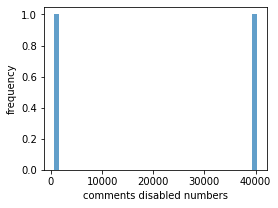

In [38]:
fig = plt.figure(figsize = (4, 3))
plt.hist(np.array(US_data_comments_disabled), bins = 40, alpha = 0.7)
plt.xlabel('comments disabled numbers')
plt.ylabel('frequency')
plt.show()

### Ratings_disabled

In [39]:
US_data_ratings_disabled = US_data['ratings_disabled'].value_counts()
US_data_ratings_disabled

False    40780
True       169
Name: ratings_disabled, dtype: int64

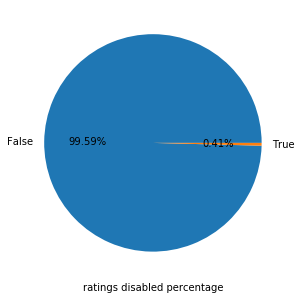

In [40]:
fig = plt.figure(figsize = (5, 5))
plt.pie(np.array(US_data_ratings_disabled), autopct='%.2f%%', labels = ['False', 'True'])
plt.xlabel('ratings disabled percentage')
plt.show()

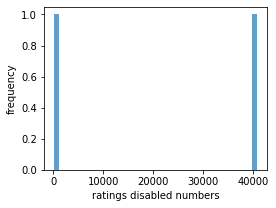

In [41]:
fig = plt.figure(figsize = (4, 3))
plt.hist(np.array(US_data_ratings_disabled), bins = 40, alpha = 0.7)
plt.xlabel('ratings disabled numbers')
plt.ylabel('frequency')
plt.show()

### Video_error_or_removed

In [42]:
US_data_video_error_or_removed = US_data['video_error_or_removed'].value_counts()
US_data_video_error_or_removed

False    40926
True        23
Name: video_error_or_removed, dtype: int64

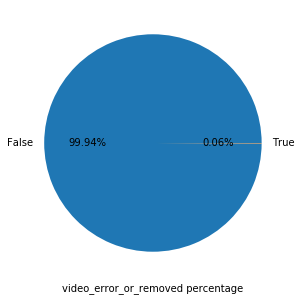

In [43]:
fig = plt.figure(figsize = (5, 5))
plt.pie(np.array(US_data_video_error_or_removed), autopct='%.2f%%', labels = ['False', 'True'])
plt.xlabel('video_error_or_removed percentage')
plt.show()

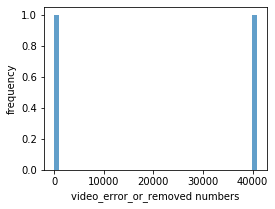

In [44]:
fig = plt.figure(figsize = (4, 3))
plt.hist(np.array(US_data_video_error_or_removed), bins = 40, alpha = 0.7)
plt.xlabel('video_error_or_removed numbers')
plt.ylabel('frequency')
plt.show()

### Description

数据集中Description项存在缺失值。  
可能的原因：up主在上传视频时没有添加描述。  
可以处理的方式：  
- 将缺失值的条目删除
- 用title代替

In [45]:
none_description_quantity = [x for x in US_data['description'] if x == '']
len(none_description_quantity)

570

In [46]:
US_data['description']
for i in range(len(US_data['description'])):
    if(US_data['description'][i] == ''):
        US_data.loc[i,'description'] = US_data.loc[i,'title']

In [47]:
none_description_quantity_after = [x for x in US_data['description'] if x == '']
len(none_description_quantity_after)

0

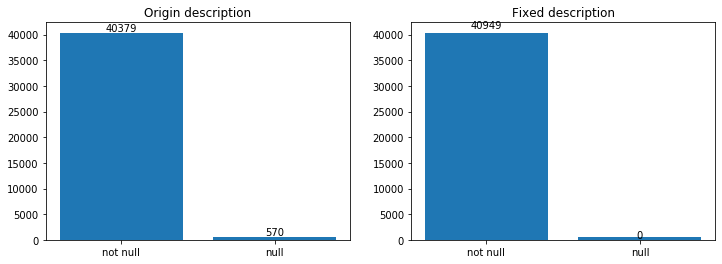

In [48]:
fig = plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Origin description')
X = ['not null','null']
Y = [len(US_data['description'])-len(none_description_quantity),len(none_description_quantity)]
plt.bar(X,Y)
for x,y in zip(X,Y):
    plt.text(x,y,'%d' %y, ha='center',va='bottom')
plt.subplot(122)
plt.title('Fixed description')
Y_after = [len(US_data['description'])-len(none_description_quantity_after),len(none_description_quantity_after)]
plt.bar(X,Y)
for x,y_after in zip(X,Y_after):
    plt.text(x,y_after,'%d' %y_after, ha='center',va='bottom')